In [1]:
import pandas as pd
import sys, os

sys.path.append("../")
from utils.loggers import Logger01
from strategies.TaLib_SMACross import TaLib_SMACross
from datetime import datetime
from utils.basic import get_report_complete
from utils.sizers import Ludopata

sys.path.append("../libraries/backtrader")
import backtrader as bt

sys.path.append('../libraries/quantstats')
import quantstats as qs

In [2]:
# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(TaLib_SMACross)

datapath='../data/us/daily/aapl.csv'
df = pd.read_csv(datapath)
df['date'] = pd.to_datetime(df['date'])
# Create a Data Feed
data = bt.feeds.PandasData(dataname=df,datetime=0,open=1,high=2,low=3,close=4,volume=5)

df = pd.read_csv(datapath)
df["date"] = pd.to_datetime(df["date"])
# Create a Data Feed
data = bt.feeds.PandasData(
    dataname=df, datetime=0, open=1, high=2, low=3, close=4, volume=5
)

# Add the Data Feed to Cerebro
cerebro.adddata(data)
cerebro.resampledata(data, name=datapath.replace("/", "-").replace("\\", "-"))

log_path = f'../backtests/test_TaLib_SMACross_{datapath.replace("/","-").replace(chr(92),"-")}_{datetime.now().isoformat()}'

cerebro.addanalyzer(Logger01, log_path=log_path, data_df=df)

# Set our desired cash start
cerebro.broker.setcash(1000)
cerebro.broker.setcommission(commission=0.001, margin=None,leverage=10)

if not os.path.exists(log_path):
    os.makedirs(log_path)
writer_path = os.path.join(log_path, "writer.csv")
cerebro.addwriter(bt.WriterFile, csv=True, out=writer_path)

cerebro.addsizer(Ludopata)

# Print out the starting conditions
print("Starting Portfolio Value: %.2f" % cerebro.broker.getvalue())

# Run over everything
cerebro.run(exactbars=1)

# Print out the final result
print("Final Portfolio Value: %.2f" % cerebro.broker.getvalue())


Starting Portfolio Value: 1000.00
[LOG] - Funds logged
[LOG] - Orders logged
[LOG] - Trades logged


/home/fcelaya/quant/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


No analysis
Final Portfolio Value: 1000.00


/home/fcelaya/quant/venv/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/fcelaya/quant/venv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/fcelaya/quant/venv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/fcelaya/quant/venv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:194: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/home/fcelaya/quant/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/fcelaya/quant/venv/lib/python3.7/site-pack

/home/fcelaya/quant/venv/lib/python3.7/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/fcelaya/quant/venv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:170: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/home/fcelaya/quant/venv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:187: RuntimeWarning: divide by zero encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)
/home/fcelaya/quant/venv/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:194: RuntimeWarning: invalid value encountered in double_scalars
  intercept_stderr = slope_stderr * np.sqrt(ssxm + xmean**2)
/home/fcelaya/quant/venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/fcelaya/quant/venv/lib/python3.7/site-pack

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2010-01-04  2010-01-04
End Period                 2022-06-29  2022-06-29
Risk-Free Rate             0.0%        0.0%
Time in Market             0.0%        100.0%

Cumulative Return          0.00%       1,721.62%
CAGR﹪                     0.0%        26.16%

Sharpe                     -           0.96
Prob. Sharpe Ratio         -           99.96%
Smart Sharpe               -           -
Sortino                    -           1.41
Smart Sortino              -           -
Sortino/√2                 -           0.99
Smart Sortino/√2           -           -
Omega                      -           -

Max Drawdown               -           -44.38%
Longest DD Days            -           -
Volatility (ann.)          0.0%        28.42%
R^2                        0.0         0.0
Information Ratio          -0.06       -0.06
Calmar                     -           0.59
Skew 

None

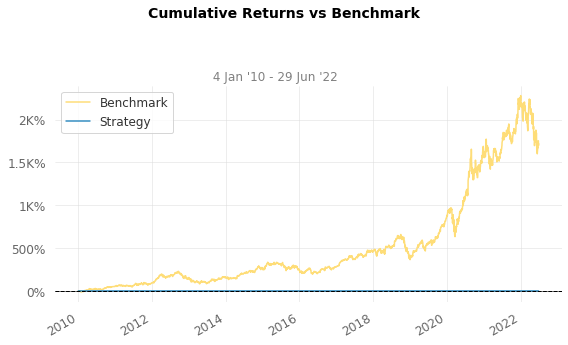

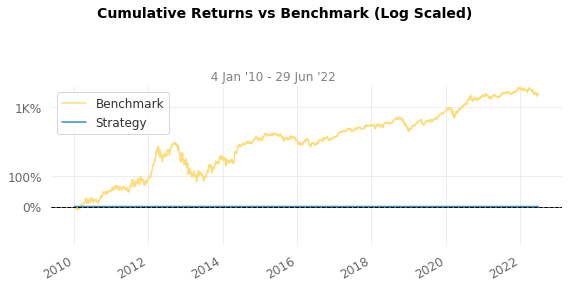

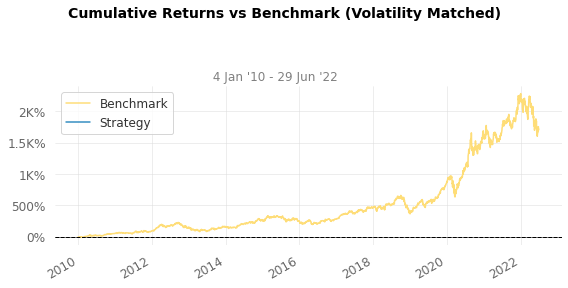

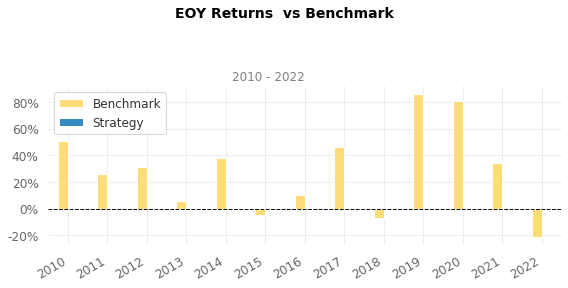

/home/fcelaya/quant/venv/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


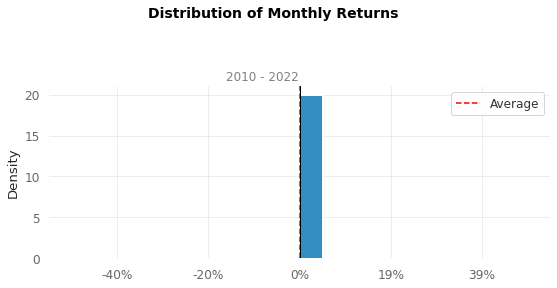

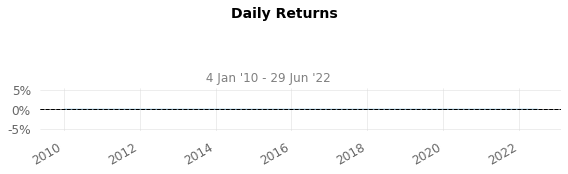

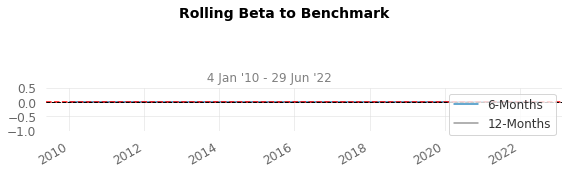

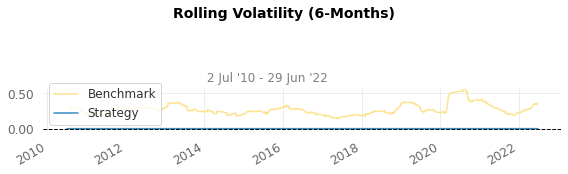

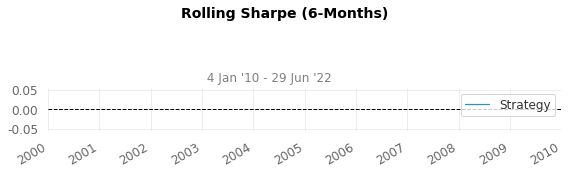

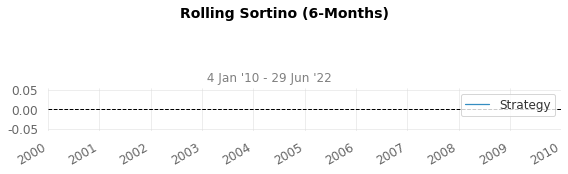

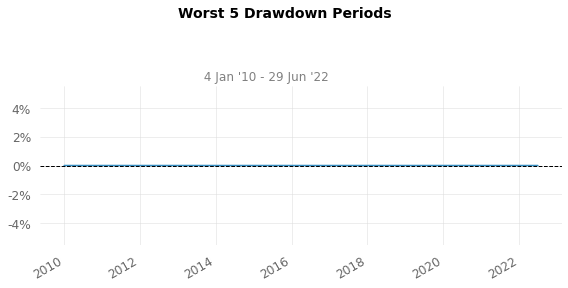

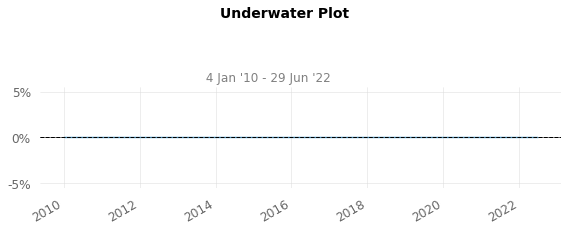

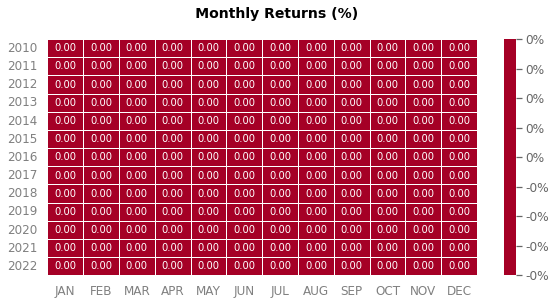

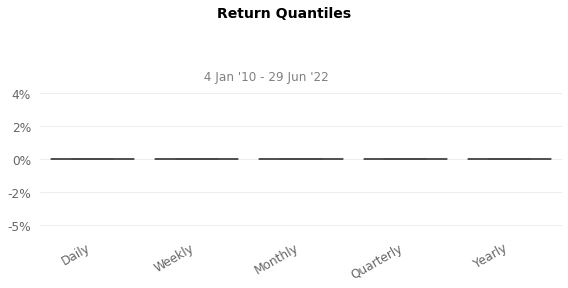

In [3]:
get_report_complete(log_path=log_path, html=True,console=True)